In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Yibabe\Desktop\10acadamyAMIweek-8-9\data\scaled_encoded.csv')

In [2]:
df.head()

,Unnamed: 0.1,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,age,class,ip_int,...,time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,30049,31545,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,0.120690,0,0.230787,...,0.0,0.434783,0.833333,0,1,0,0,0,0,0
1,95244,97542,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,0.344828,0,0.740156,...,0.0,0.913043,0.833333,1,0,0,0,0,1,0
2,11606,12873,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,0.120690,0,0.090685,...,0.0,0.478261,0.500000,0,1,0,0,0,0,1
3,101959,104500,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,0.017241,0,0.793420,...,0.0,0.869565,0.333333,0,0,0,0,0,1,1
4,19600,21011,16,2015-02-03 13:48:23,2015-03-12 12:46:23,0.000000,FROZWSSWOHZBE,0.241379,0,0.150092,...,0.0,0.521739,0.500000,1,0,0,1,0,0,1


check up is there any inapproprate qualities and drop unneccessary columns

In [3]:
# Convert datetime columns to numeric (if not already done)
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# Optionally drop the original datetime columns if time_diff is used
merged_data = df.drop(['signup_time', 'purchase_time'], axis=1)


In [4]:
df_merged = merged_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [5]:
# Drop non-numeric columns that are not useful for correlation analysis
df1_merged = df_merged.drop(['device_id', 'country'], axis=1)


In [5]:
df1_merged.shape

(129146, 17)

In [6]:
df1_merged['day'] = pd.to_datetime(df1_merged['day'])

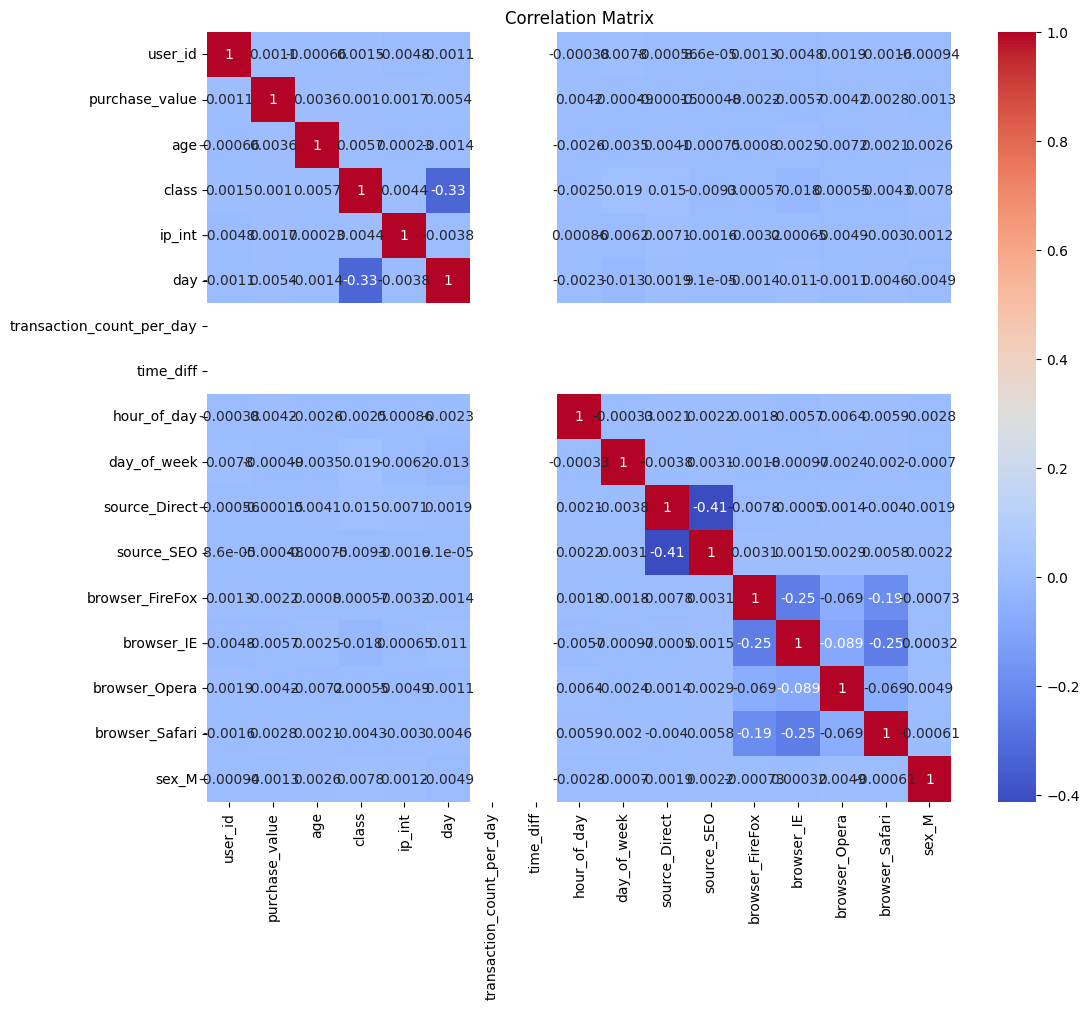

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df1_merged.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [7]:
# Calculate the correlation matrix
corr_matrix = df1_merged.corr()

# Threshold for dropping highly correlated features
threshold = 0.9
# Identify columns to drop based on high correlation
to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop.add(colname)

# Drop the identified columns
df1_merged.drop(columns=to_drop, inplace=True)



In [8]:
df1_merged.head()

,user_id,purchase_value,age,class,ip_int,day,transaction_count_per_day,time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,2,0.310345,0.120690,0,0.230787,2015-02-21,0.0,0.0,0.434783,0.833333,0,1,0,0,0,0,0
1,4,0.220690,0.344828,0,0.740156,2015-09-26,0.0,0.0,0.913043,0.833333,1,0,0,0,0,1,0
2,8,0.262069,0.120690,0,0.090685,2015-08-13,0.0,0.0,0.478261,0.500000,0,1,0,0,0,0,1
3,12,0.179310,0.017241,0,0.793420,2015-03-04,0.0,0.0,0.869565,0.333333,0,0,0,0,0,1,1
4,16,0.000000,0.241379,0,0.150092,2015-03-12,0.0,0.0,0.521739,0.500000,1,0,0,1,0,0,1


In [9]:
# Save the cleaned data
df1_merged.to_csv('cleaned_merged_data.csv', index=False)



save the cleaned data to the csv file 

In [8]:
df1_merged.drop(['user_id'], axis=1, inplace=True)

In [11]:
df1_merged.head()

,purchase_value,age,class,ip_int,day,transaction_count_per_day,time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,0.310345,0.120690,0,0.230787,2015-02-21,0.0,0.0,0.434783,0.833333,0,1,0,0,0,0,0
1,0.220690,0.344828,0,0.740156,2015-09-26,0.0,0.0,0.913043,0.833333,1,0,0,0,0,1,0
2,0.262069,0.120690,0,0.090685,2015-08-13,0.0,0.0,0.478261,0.500000,0,1,0,0,0,0,1
3,0.179310,0.017241,0,0.793420,2015-03-04,0.0,0.0,0.869565,0.333333,0,0,0,0,0,1,1
4,0.000000,0.241379,0,0.150092,2015-03-12,0.0,0.0,0.521739,0.500000,1,0,0,1,0,0,1


In [9]:
df2_merged = df1_merged.drop(['day'],axis ='columns')

In [14]:
df2_merged.to_csv(r'C:\Users\Yibabe\Desktop\10acadamyAMIweek-8-9\data\cleaned_merged.csv')

In [10]:
df_creditcard = pd.read_csv(r'C:\Users\Yibabe\Desktop\10acadamyAMIweek-8-9\data\creditcard.csv')

In [11]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


check the class columns are in correct fromat in logical way

In [76]:
all_zeros = (df_creditcard['Class'] == 0).all()

In [77]:
if all_zeros:
    print("All values in the 'class' column are 0.")
else:
    print("Not all values in the 'class' column are 0.")

Not all values in the 'class' column are 0.


 Feature and Target Separation

In [12]:
# For Fraud_Data (merged with IP and cleaned)
X_fraud = df2_merged.drop(columns=['class'])  # Features
y_fraud = df2_merged['class']   # Target variable

In [13]:
# For CreditCard data
X_creditcard = df_creditcard.drop(columns=['Class'])  # Features
y_creditcard = df_creditcard['Class']   

 Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
# Split the merged Fraud_Data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.3, random_state=42) 

In [15]:
X_fraud_train.shape

(90402, 14)

In [16]:
X_fraud_test.shape

(38744, 14)

In [17]:
# Split the CreditCard data
X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(
    X_creditcard, y_creditcard, test_size=0.3, random_state=42)

In [18]:
X_creditcard_test.shape

(85443, 30)

In [25]:
X_creditcard_train.shape

(199364, 30)

import neccessary libraries 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


Train and Evaluate Each Model

In [20]:
# Logistic Regression for Fraud_Data
log_reg_fraud = LogisticRegression(max_iter=1000, random_state=42)
log_reg_fraud.fit(X_fraud_train, y_fraud_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
# Predict on the test set
y_fraud_pred_log_reg = log_reg_fraud.predict(X_fraud_test)


In [22]:

# Evaluate performance
print("Logistic Regression - Fraud_Data")
print("Accuracy:") 
accuracy_score(y_fraud_test, y_fraud_pred_log_reg)


Logistic Regression - Fraud_Data
Accuracy:


0.9045013421432996

In [23]:
# Logistic Regression for CreditCard data
log_reg_credit = LogisticRegression(max_iter=1000, random_state=42)
log_reg_credit.fit(X_creditcard_train, y_creditcard_train)

c:\Users\Yibabe\Desktop\10acadamyAMIweek-8-9\nevn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [24]:
# Predict on the test set
y_credit_pred_log_reg = log_reg_credit.predict(X_creditcard_test)



In [25]:
# Evaluate performance
print("\nLogistic Regression - CreditCard Data")
print("Accuracy:", accuracy_score(y_creditcard_test, y_credit_pred_log_reg))



Logistic Regression - CreditCard Data
Accuracy: 0.999204147794436


Decision Tree

In [26]:
# Decision Tree for Fraud_Data
decision_tree_fraud = DecisionTreeClassifier(random_state=42)
decision_tree_fraud.fit(X_fraud_train, y_fraud_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Predict on the test set
y_fraud_pred_tree = decision_tree_fraud.predict(X_fraud_test)

In [28]:
# Evaluate performance
print("\nDecision Tree - Fraud_Data")
print("Accuracy:")
accuracy_score(y_fraud_test, y_fraud_pred_tree)




Decision Tree - Fraud_Data
Accuracy:


0.8953644435267396

In [38]:
print(classification_report(y_fraud_test, y_fraud_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     35044
           1       0.46      0.57      0.51      3700

    accuracy                           0.90     38744
   macro avg       0.71      0.75      0.72     38744
weighted avg       0.91      0.90      0.90     38744



In [29]:
# Decision Tree for CreditCard data
decision_tree_credit = DecisionTreeClassifier(random_state=42)
decision_tree_credit.fit(X_creditcard_train, y_creditcard_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Predict on the test set
y_credit_pred_tree = decision_tree_credit.predict(X_creditcard_test)

In [31]:
# Evaluate performance
print("\nDecision Tree - CreditCard Data")
print("Accuracy:", accuracy_score(y_creditcard_test, y_credit_pred_tree))



Decision Tree - CreditCard Data
Accuracy: 0.9990871107053826


In [42]:
print(classification_report(y_creditcard_test, y_credit_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.75      0.72       136

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Random Forest

In [28]:
# Random Forest for Fraud_Data
random_forest_fraud = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_fraud.fit(X_fraud_train, y_fraud_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set
y_fraud_pred_rf = random_forest_fraud.predict(X_fraud_test)

In [30]:

# Evaluate performance
print("\nRandom Forest - Fraud_Data")
print("Accuracy:", accuracy_score(y_fraud_test, y_fraud_pred_rf))



Random Forest - Fraud_Data
Accuracy: 0.9551414412554202


In [46]:
print(classification_report(y_fraud_test, y_fraud_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35044
           1       0.99      0.53      0.69      3700

    accuracy                           0.96     38744
   macro avg       0.97      0.77      0.84     38744
weighted avg       0.96      0.96      0.95     38744



In [31]:
# Random Forest for CreditCard data
random_forest_credit = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_credit.fit(X_creditcard_train, y_creditcard_train)  

RandomForestClassifier(random_state=42)

In [32]:
# Predict on the test set
y_credit_pred_rf = random_forest_credit.predict(X_creditcard_test)

In [50]:
# Evaluate performance
print("\nRandom Forest - CreditCard Data")
print("Accuracy:", accuracy_score(y_creditcard_test, y_credit_pred_rf))



Random Forest - CreditCard Data
Accuracy: 0.9996137776061234


Gradient Boosting Implementation

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting for Fraud_Data
gb_fraud = GradientBoostingClassifier(random_state=42)
gb_fraud.fit(X_fraud_train, y_fraud_train)
y_fraud_pred_gb = gb_fraud.predict(X_fraud_test)


In [52]:
fraud_gb_accuracy = accuracy_score(y_fraud_test, y_fraud_pred_gb)
print(f'Gradient Boosting - Fraud_Data Accuracy: {fraud_gb_accuracy}')

Gradient Boosting - Fraud_Data Accuracy: 0.9046045839355771


ML flow for the given model type

In [33]:
import mlflow
import mlflow.sklearn


In [34]:
with mlflow.start_run(run_name="Logistic Regression - Fraud_Data"):
    # Log parameters
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_param("data_type", "Fraud_Data")

    # Fit the model
    log_reg_fraud.fit(X_fraud_train, y_fraud_train)

    # Log accuracy as a metric
    fraud_accuracy = log_reg_fraud.score(X_fraud_test, y_fraud_test)
    mlflow.log_metric("accuracy", fraud_accuracy)

    # Log the model itself
    mlflow.sklearn.log_model(log_reg_fraud, "model")


2024/10/22 21:37:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [35]:
with mlflow.start_run(run_name="Decision Tree - Fraud_Data"):
    # Log parameters
    mlflow.log_param("model_type", "Decision Tree")
    mlflow.log_param("data_type", "Fraud_Data")

    # Fit the model
    decision_tree_fraud.fit(X_fraud_train, y_fraud_train)

    # Log accuracy as a metric
    fraud_accuracy = decision_tree_fraud.score(X_fraud_test, y_fraud_test)
    mlflow.log_metric("accuracy", fraud_accuracy)

    # Log the model itself
    mlflow.sklearn.log_model(decision_tree_fraud, "model")


2024/10/22 21:44:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


TASK-3 1. SHAP (SHapley Additive exPlanations)

In [36]:
import shap  

Import SHAP and Set Up the SHAP Explainer

In [37]:
# Create a SHAP explainer for the decision tree trained on Fraud_Data
explainer_fraud = shap.TreeExplainer(decision_tree_fraud)
# Calculate SHAP values for the test set
shap_values_fraud = explainer_fraud.shap_values(X_fraud_test)

SHAP Plots
Summary Plot: This plot will show the importance of each feature in the model.

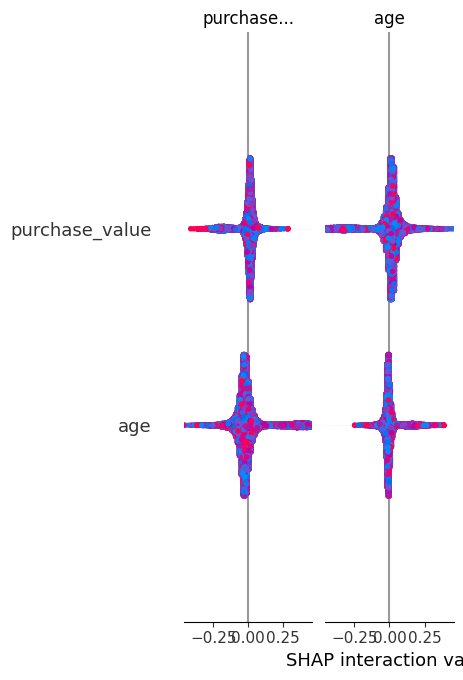

In [39]:
shap.summary_plot(shap_values_fraud, X_fraud_test)


In [46]:
explainer_credit = shap.TreeExplainer(decision_tree_fraud)
shap_values_credit = explainer_credit.shap_values(X_creditcard_test)


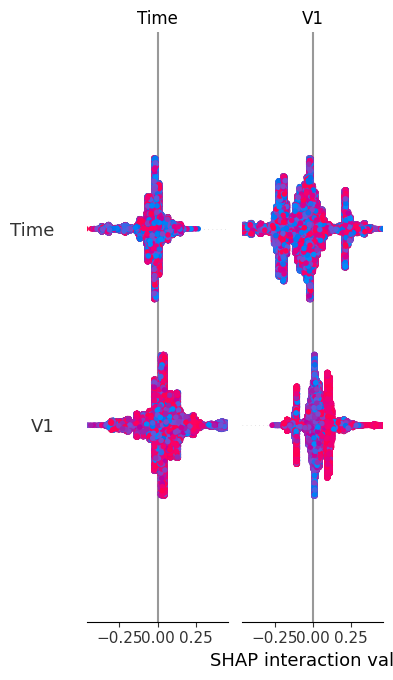

In [47]:
shap.summary_plot(shap_values_credit, X_creditcard_test)

In [32]:
import joblib

In [34]:
# Save the trained model
joblib.dump(decision_tree_fraud, 'decision_tree_fraud_model.pkl')


['decision_tree_fraud_model.pkl']